In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # scale and center data
import matplotlib.colors as colors
import seaborn as sns
#Metrics
from sklearn.metrics import accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pd.set_option('display.max_columns', None)

df = pd.read_csv('train.csv', encoding='cp1252')
df.replace(to_replace=[np.nan, "NA"], value=0, inplace=True)

C:\Users\Oscar Paredez\AppData\Local\Temp\ipykernel_27248\1525750946.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(eliminate, 1, inplace=True)


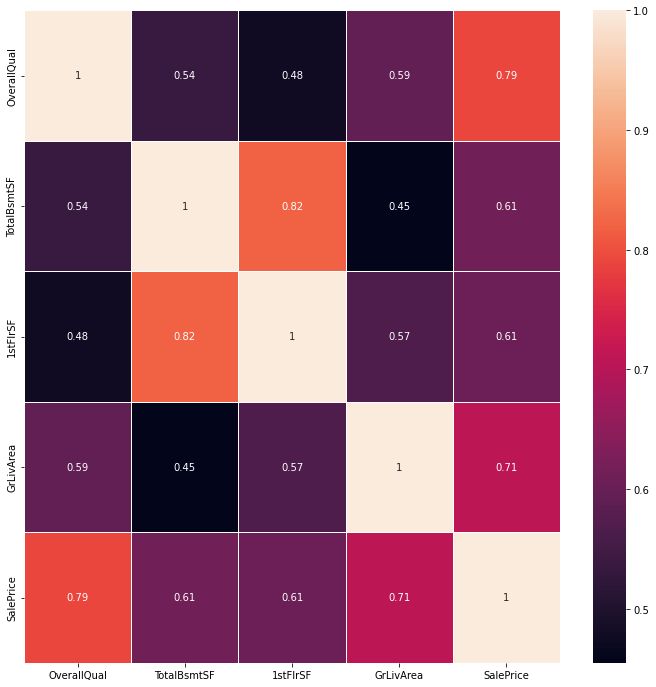

In [139]:
import matplotlib.pyplot as plt

import numpy as np
int64_bool = df.apply(lambda x: (True if x.dtype == np.int64 else False),axis = 0)
df = df[df.columns[int64_bool]]

eliminate = ['Id', 'GarageArea', 'GarageCars', 'TotRmsAbvGrd', 'OpenPorchSF', '2ndFlrSF',  'KitchenAbvGr', 'EnclosedPorch', 'OverallCond', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'Fireplaces', 'WoodDeckSF', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'MSSubClass', 'LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath']
df.drop(eliminate, 1, inplace=True)
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [140]:
#2

minPrice = df['SalePrice'].min()
maxPrice = df['SalePrice'].max()
avg = (maxPrice - minPrice) / 3
df['Clasificacion'] = df['SalePrice']

df['Clasificacion'][df['SalePrice'] < minPrice + avg] = 0
df['Clasificacion'][df['SalePrice'] >= minPrice + avg] = 1
df['Clasificacion'][df['SalePrice'] >= minPrice + avg * 2] = 2

In [141]:
df['Cara'] = df['Clasificacion']
df['Cara'][df['Clasificacion'] == 2] = 1
df['Cara'][df['Clasificacion'] != 2] = 0
df['Media'] = df['Clasificacion']
df['Media'][df['Clasificacion'] == 1] = 1
df['Media'][df['Clasificacion'] != 1] = 0
df['Economica'] = df['Clasificacion']
df['Economica'][df['Clasificacion'] == 0] = 1
df['Economica'][df['Clasificacion'] != 0] = 0

Modelo con Clasificacion

In [142]:
df = df.drop('SalePrice', axis = 1)
df['Clasificacion'] = df['Clasificacion'].astype('category')
clasificacion = df.pop('Clasificacion') 

Y = clasificacion
X = df #El resto de los datos

X_train, X_test,y_train, y_test = train_test_split(X, Y,test_size=0.3, train_size=0.7, random_state=69)

Modelo 1: Categorias de Precio de Casas

In [143]:
#Modelo #1
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor

scaler = StandardScaler()
scaler.fit(df)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [144]:
#Red Neuronal 1

mlp = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("Precision:", precision_score(y_test,y_pred,average='micro') )
print ("Recall: ", recall_score(y_test,y_pred,average='micro'))

matriz = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión: ', matriz)


Accuracy: 1.0
Precision: 1.0
Recall:  1.0
Matriz de confusión:  [[390   0   0]
 [  0  47   0]
 [  0   0   1]]


In [145]:
#Red Neuronal 2

mlp = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=500, activation='logistic')
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("Precision:", precision_score(y_test,y_pred,average='micro') )
print ("Recall: ", recall_score(y_test,y_pred,average='micro'))

matriz = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión: ', matriz)

Accuracy: 0.997716894977169
Precision: 0.997716894977169
Recall:  0.997716894977169
Matriz de confusión:  [[390   0   0]
 [  0  47   0]
 [  0   1   0]]


Modelo con SalePrice

In [146]:
#volviendo a cargar los datos

df = pd.read_csv('train.csv', encoding='cp1252')
df.replace(to_replace=[np.nan, "NA"], value=0, inplace=True)
df.fillna(0)

cualitativas = ['Id', 'MSSubClass', 'Functional', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
df.drop(cualitativas, 1, inplace=True)

C:\Users\Oscar Paredez\AppData\Local\Temp\ipykernel_27248\2421020603.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(cualitativas, 1, inplace=True)


In [147]:
Y = df.pop("SalePrice")
X = df #El resto de los datos

X_train, X_test,y_train, y_test = train_test_split(X, Y,test_size=0.3, train_size=0.7, random_state=69)

In [148]:
mlp = MLPRegressor(random_state=69, max_iter=500)
mlp.fit(X_train,y_train)


MLPRegressor(max_iter=500, random_state=69)

In [149]:
#Red Neuronal #1
mlp.predict(X_test)
mlp.score(X_test, y_test)

0.6667637363933021

In [150]:
#Red Neuronal 2
mlp = MLPRegressor(random_state=69, max_iter=500, hidden_layer_sizes=(3,4), activation='identity')
mlp.fit(X_train,y_train)
mlp.predict(X_test)

print(mlp.score(X_test, y_test))


0.6617630369727412


C:\Users\Oscar Paredez\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
